# Visualizing Confusion Matrices - Lab

## Introduction

In this lab, you'll build upon the previous lesson on confusion matrices and create a confusion matrix visualization using matplotlib. 

## Objectives

You will be able to:
* Create visualizations of a confusion matrix
* Interpret a confusion matrix to assess model performance

## Confusion matrices

Recall that the confusion matrix represents the counts (or normalized counts) of our True Positives, False Positives, True Negatives and False Negatives. This can further be visualized when analyzing the effectiveness of our classification algorithm.   
  
Here's an example of generating a confusion matrix:
<img src="./images/new_confusion_matrix.png" width="350">

With that, let's look at some code for generating this visual.

## Create our model
As usual, start by fitting a model to data by importing, normalizing, splitting into train and test sets and then calling your chosen algorithm.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Load the data
df = pd.read_csv('heart.csv')

#Data Preview
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#Define appropriate X and y
X = df[df.columns[:-1]]
y = df.target

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Normalize the Data
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#Fit a model
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model_log = logreg.fit(X_train_sc, y_train)
print(model_log) #Preview model params

#Predict
y_hat_test = logreg.predict(X_test_sc)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Create the confusion matrix

To gain a better understanding of confusion matrices, complete the `conf_matrix` function in the cell below.  This function should:

* Take in 2 arguments: 
    * `y_true`, an array of labels
    * `y_pred`, an array of model predictions
* Return a Confusion Matrix in the form of a dictionary, where the keys are `'TP', 'TN', 'FP', 'FN'`. 


In [3]:
def conf_matrix(y_true, y_pred):
    cf = {}
    cf['TP'] = (y_true+y_pred==2).sum()
    cf['TN'] = (y_true+y_pred==0).sum()
    cf['FP'] = (y_true-y_pred==-1).sum()
    cf['FN'] = (y_true-y_pred==1).sum()
    return cf

In [4]:
conf_matrix(y_test, y_hat_test)

{'TP': 38, 'TN': 24, 'FP': 9, 'FN': 5}

## Checking Your Work with sklearn

To check your work, make use the the `confusion_matrix()` function found in `sklearn.metrics` to create some confusion matrices and make sure that sklearn's results match up with your own.

In the cells below, import the `confusion_matrix()` function, use it to create a confusion matrix for each of your models, and then compare the results with the confusion matrices we created above. 

In [5]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[24,  9],
       [ 5, 38]])

In [6]:
cnf_matrix/cnf_matrix.sum(axis=1).reshape(-1,1)

array([[0.72727273, 0.27272727],
       [0.11627907, 0.88372093]])

## Creating a Nice Visual
Creating a pretty visual is a little more complicated. Generating the initial image is simple but you'll have to use the itertools package to iterate over the matrix and append labels to the individual cells. In this example, `cnf_matrix` should be the result of the sci-kit learn implementation of confusion matrix.

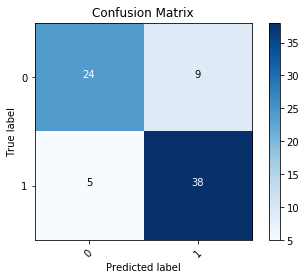

In [7]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar();

## Create a general function that plots the confusion matrix
Generalize the above code into a function that you can reuse to create confusion matrix visuals going forward.

In [8]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Pseudocode/Outline:
    #Print the confusion matrix (optional)
    #Create the basic matrix.
    #Add title and Axis Labels
    #Add appropriate Axis Scales
    #Add Labels to Each Cell
    #Add a Side Bar Legend Showing Colors
    plt.imshow(cm,  cmap=cmap)
    
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    class_names = set(classes) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    thresh = cm.max()/2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.colorbar();

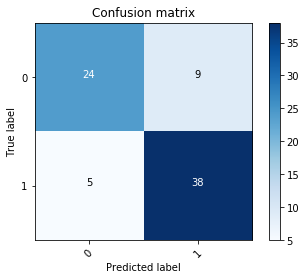

In [9]:
plot_confusion_matrix(cnf_matrix, y_test)

## Update your function to include an option for normalization.
When the normalization parameter is set to True, your function should return percentages for the each label class in the visual rather then raw counts.

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Check if Normalization Option is Set to True. If so, normalize the raw confusion matrix before visualizing
    c_m = cm.copy()
    
    if normalize:
        c_m = (cm/cm.sum(axis=1).reshape(-1,1)).round(3)
                
    
    #Other code should be equivalent to your previous function

    #Print the confusion matrix (optional)
    #Create the basic matrix.
    #Add title and Axis Labels
    #Add appropriate Axis Scales
    #Add Labels to Each Cell
    #Add a Side Bar Legend Showing Colors
    plt.imshow(c_m,  cmap=cmap)
    
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    class_names = set(classes) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    thresh = c_m.max()/2
    
    for i, j in itertools.product(range(c_m.shape[0]), range(c_m.shape[1])):
        plt.text(j, i, c_m[i, j],
                 horizontalalignment="center",
                 color="white" if c_m[i, j] > thresh else "black")
        
    plt.colorbar()

## Create a normalized confusion matrix
Call your function to create a normalized confusion matrix for the model above.

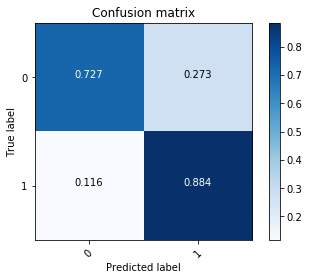

In [11]:
# Plot normalized confusion matrix
# Your code here
plot_confusion_matrix(cnf_matrix, y_test, normalize=True)

## Summary
Well done! In this lab you previewed the confusion matrix and practiced matplotlib skills for producing visualizations!